### Example: inclined domain 

$$\beta=20^\circ$$

$$\phi=1$$
$$\kappa = 1$$

In [ ]:
from lucifex.fdm import AB2, CN
from lucifex.sim import integrate
from lucifex.viz import plot_colormap
from lucifex.io import write

from py.porous_convection_anisotropic import porous_convection_anisotropic_rectangle


simulation = porous_convection_anisotropic_rectangle(
    Lx=1.0,
    Ly=1.0,
    Nx=64,
    Ny=64,
    cell='quadrilateral', 
    Ra=300.0, 
    kappa=1.0,
    beta=20.0,
    c_eps=1e-4, 
    c_freq=(14, 14), 
    c_seed=(456, 987), 
    D_adv=AB2,
    D_diff=CN,
)

n_stop = 200
dt_init = 1e-6
n_init = 5
integrate(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

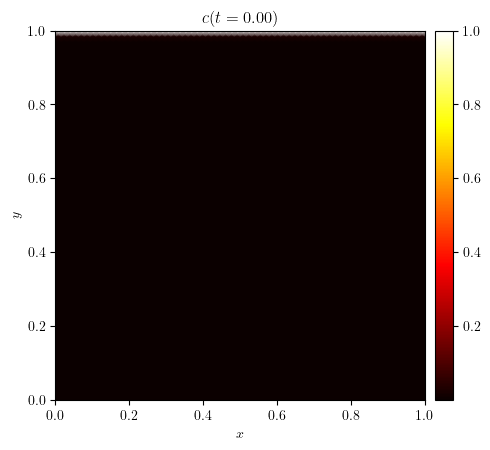

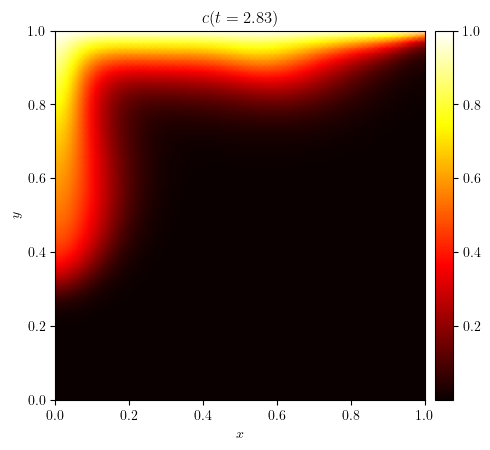

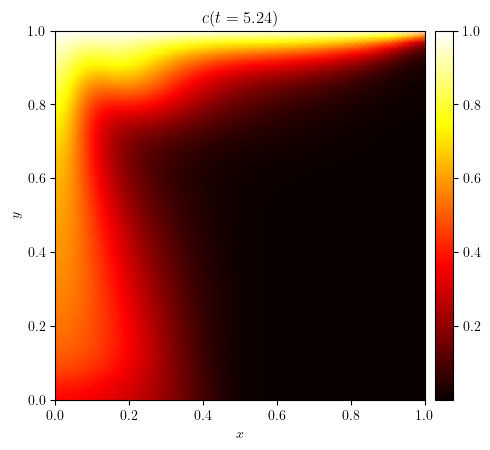

In [ ]:
c = simulation['c']

i_mid = int(0.5 * len(c.series))
time_indices = (0, i_mid,  -1)
for i in time_indices:
    fig, ax = plot_colormap(c.series[i], title=f'$c(t={c.time_series[i]:.2f})$')
    write(
        fig, 
        f'A16d_porous_convection_inclined_c(t={c.time_series[i]:.2f})', 
        './figures', 
        file_ext=['pdf', 'png'], 
        close=False, 
        pickle=False,
    )